<a href="https://colab.research.google.com/github/lukasz86s/Machine_learning/blob/main/k_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import lib and get data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set()
from sklearn.datasets import load_iris

raw_data = load_iris()
raw_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
df1 = pd.DataFrame(data=raw_data.data, columns=raw_data.feature_names)
df2 = pd.DataFrame(data=raw_data.target, columns=['class'])
df  = pd.concat([df1, df2], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#display data

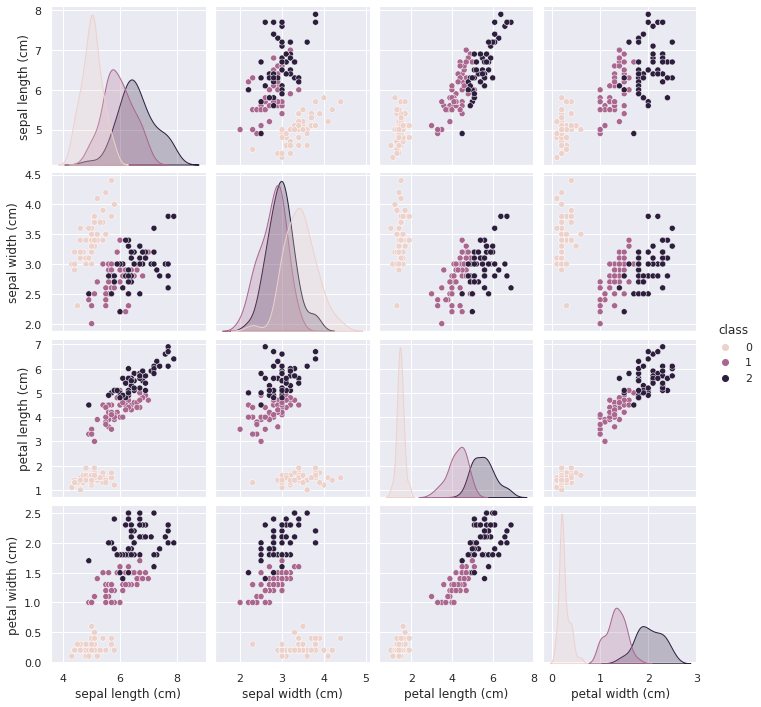

In [ ]:
_ = sns.pairplot(df, hue='class' )

In [ ]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


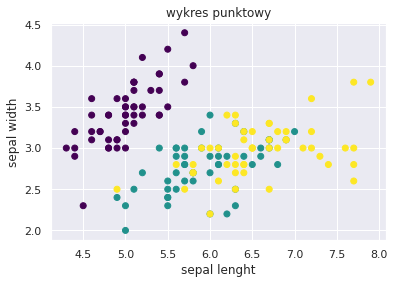

In [ ]:
X = raw_data.data
y = raw_data.target
X = X[:, :2]
#show data with pyplot
plt.scatter(X[:, 0], X[: , 1], c=y, cmap='viridis')
plt.title('wykres punktowy')
plt.xlabel('sepal lenght')
plt.ylabel('sepal width')
plt.show()

In [ ]:
df = pd.DataFrame(data=X, columns=['sepal lenght', 'sepal width'])
target = pd.DataFrame(data=y, columns=['class'])
df = pd.concat([df, target], axis=1)
#show data with plotly.express
px.scatter(data_frame=df, x='sepal lenght', y='sepal width', color='class')

#k-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=23)
classifier.fit(X, y)
#testing accuracy
accuracy = classifier.score(X, y)
accuracy

0.8066666666666666

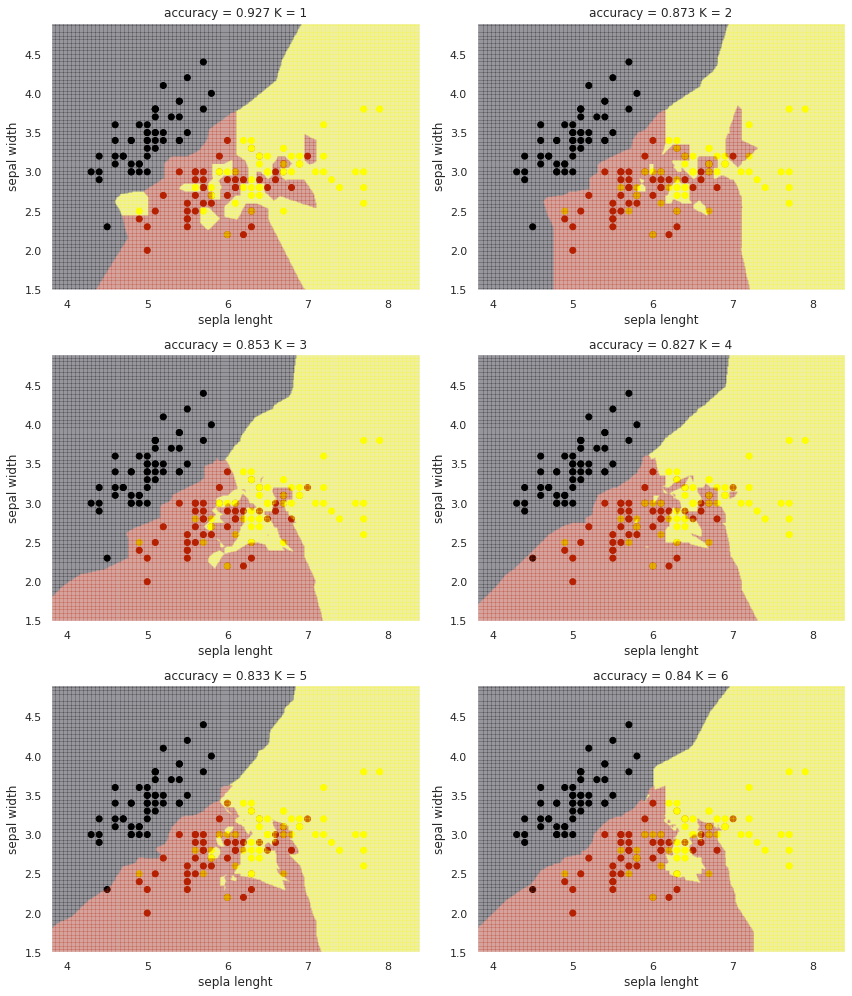

In [ ]:
plt.figure(figsize=(12, 14))
for i in range(1, 7):
  plt.subplot(3, 2, i)
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(X, y)
  accuracy = classifier.score(X, y)
 
  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  #create grid
  xx = np.arange(x_min, x_max, 0.01)
  yy = np.arange(y_min, y_max, 0.01)
  #create mesh grid
  xx, yy = np.meshgrid(xx, yy)
  #combien corditantes
  mesh = np.c_[xx.ravel(), yy.ravel()]
  #predict for mesh
  Z = classifier.predict(mesh)
  Z = Z.reshape(xx.shape)
  #create plot
  plt.scatter(X[:, 0], X[:, 1],c=y, cmap='gnuplot')
  plt.pcolormesh(xx, yy, Z, alpha=0.1, cmap='gnuplot', aa=True)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xlabel('sepla lenght')
  plt.ylabel('sepal width')
  plt.title(f'accuracy = {accuracy.round(3)} K = {i}')
  plt.tight_layout(h_pad=1.)
plt.show()

# Finding optimal n_neighbors param

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors': range(2, 35)}

classifier = KNeighborsClassifier()

gs = GridSearchCV(classifier, grid_params, cv=3)
gs.fit(X, y)
gs.best_params_

{'n_neighbors': 15}

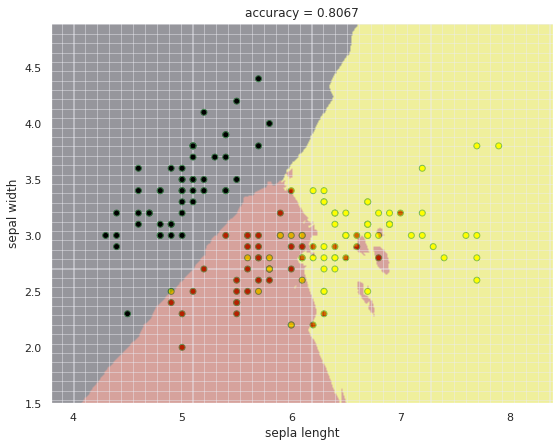

In [ ]:
classifier = gs.best_estimator_

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)

accuracy  = classifier.score(X, y)

plt.figure(figsize=(9, 7))
plt.scatter(X[:, 0], X[:, 1],c=y, cmap='gnuplot', edgecolors='g')
plt.pcolormesh(xx, yy, Z, alpha=0.1, cmap='gnuplot', aa=True)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('sepla lenght')
plt.ylabel('sepal width')
plt.title(f'accuracy = {accuracy:.4f}')
plt.show()